In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [69]:
df=pd.read_csv("Concrete_Data.csv")
df

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.03
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.45
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.29


In [70]:
df.keys()

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [71]:
df.shape

(1030, 9)

In [72]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

In [73]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

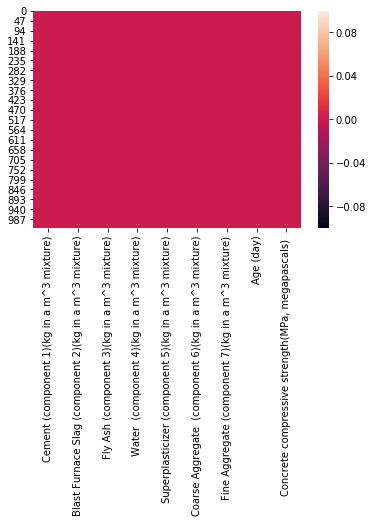

In [74]:
sns.heatmap(df.isnull())

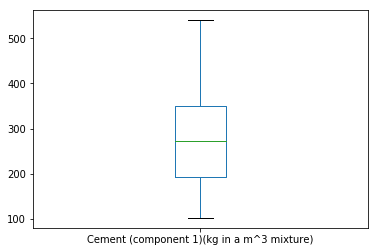

In [75]:
df['Cement (component 1)(kg in a m^3 mixture)'].plot.box()

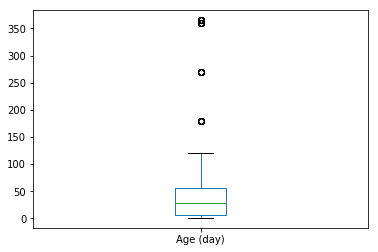

In [76]:
df['Age (day)'].plot.box()

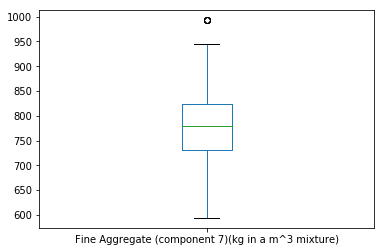

In [77]:
df['Fine Aggregate (component 7)(kg in a m^3 mixture)'].plot.box()

In [78]:
df.describe

<bound method NDFrame.describe of       Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
5                                         266.0   
6                                         380.0   
7                                         380.0   
8                                         266.0   
9                                         475.0   
10                                        198.6   
11                                        198.6   
12                                        427.5   
13                                        190.0   
14                                        304.0   
15                                        380.0   
16                                        139.6   
17                                        342.0 

Cement (component 1)(kg in a m^3 mixture)                   AxesSubplot(0.125,0.536818;0.0731132x0.343182)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
Fly Ash (component 3)(kg in a m^3 mixture)               AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
Water  (component 4)(kg in a m^3 mixture)                AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
Superplasticizer (component 5)(kg in a m^3 mixture)      AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
Fine Aggregate (component 7)(kg in a m^3 mixture)        AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
Age (day)                                                AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
Concrete compressive strength(MPa, megapascals)          AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
dtype: object

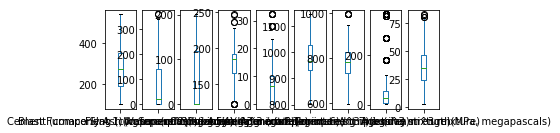

In [79]:
df.plot(kind='box',subplots=True,layout=(2,9))

In [80]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        2.64540763],
       [2.47791487, 0.85688789, 0.84714393, ..., 1.21767004, 0.27973311,
        1.56142148],
       [0.49142531, 0.79552649, 0.84714393, ..., 2.24091709, 3.55306569,
        0.26662698],
       ...,
       [1.27008832, 0.75957923, 0.85063487, ..., 0.0801067 , 0.27973311,
        0.72572939],
       [1.16860982, 1.30806485, 0.84714393, ..., 0.19116644, 0.27973311,
        0.18253855],
       [0.19403325, 0.30849909, 0.3769452 , ..., 0.15074782, 0.27973311,
        0.20469738]])

In [81]:
threshold=3
print(np.where(z>3))

(array([  2,   3,   4,   6,  12,  17,  24,  25,  26,  30,  31,  33,  34,
        35,  41,  42,  56,  60,  61,  63,  65,  66,  76,  79,  99, 102,
       122, 125, 145, 148, 168, 171, 553, 559, 571, 584, 604, 610, 616,
       620, 622, 756, 769, 792, 798, 814, 820, 873, 936], dtype=int64), array([7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 1, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 3, 3], dtype=int64))


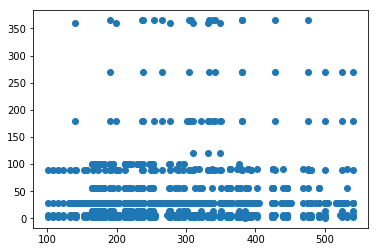

In [82]:
plt.scatter(df['Cement (component 1)(kg in a m^3 mixture)'],df['Age (day)'])
plt.show()

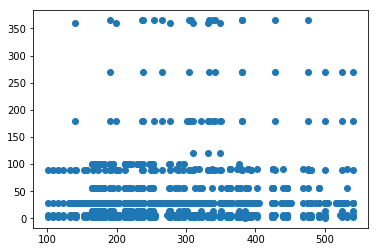

In [83]:
x=df['Cement (component 1)(kg in a m^3 mixture)']
y=df['Age (day)']
plt.scatter(x,y)
plt.show()

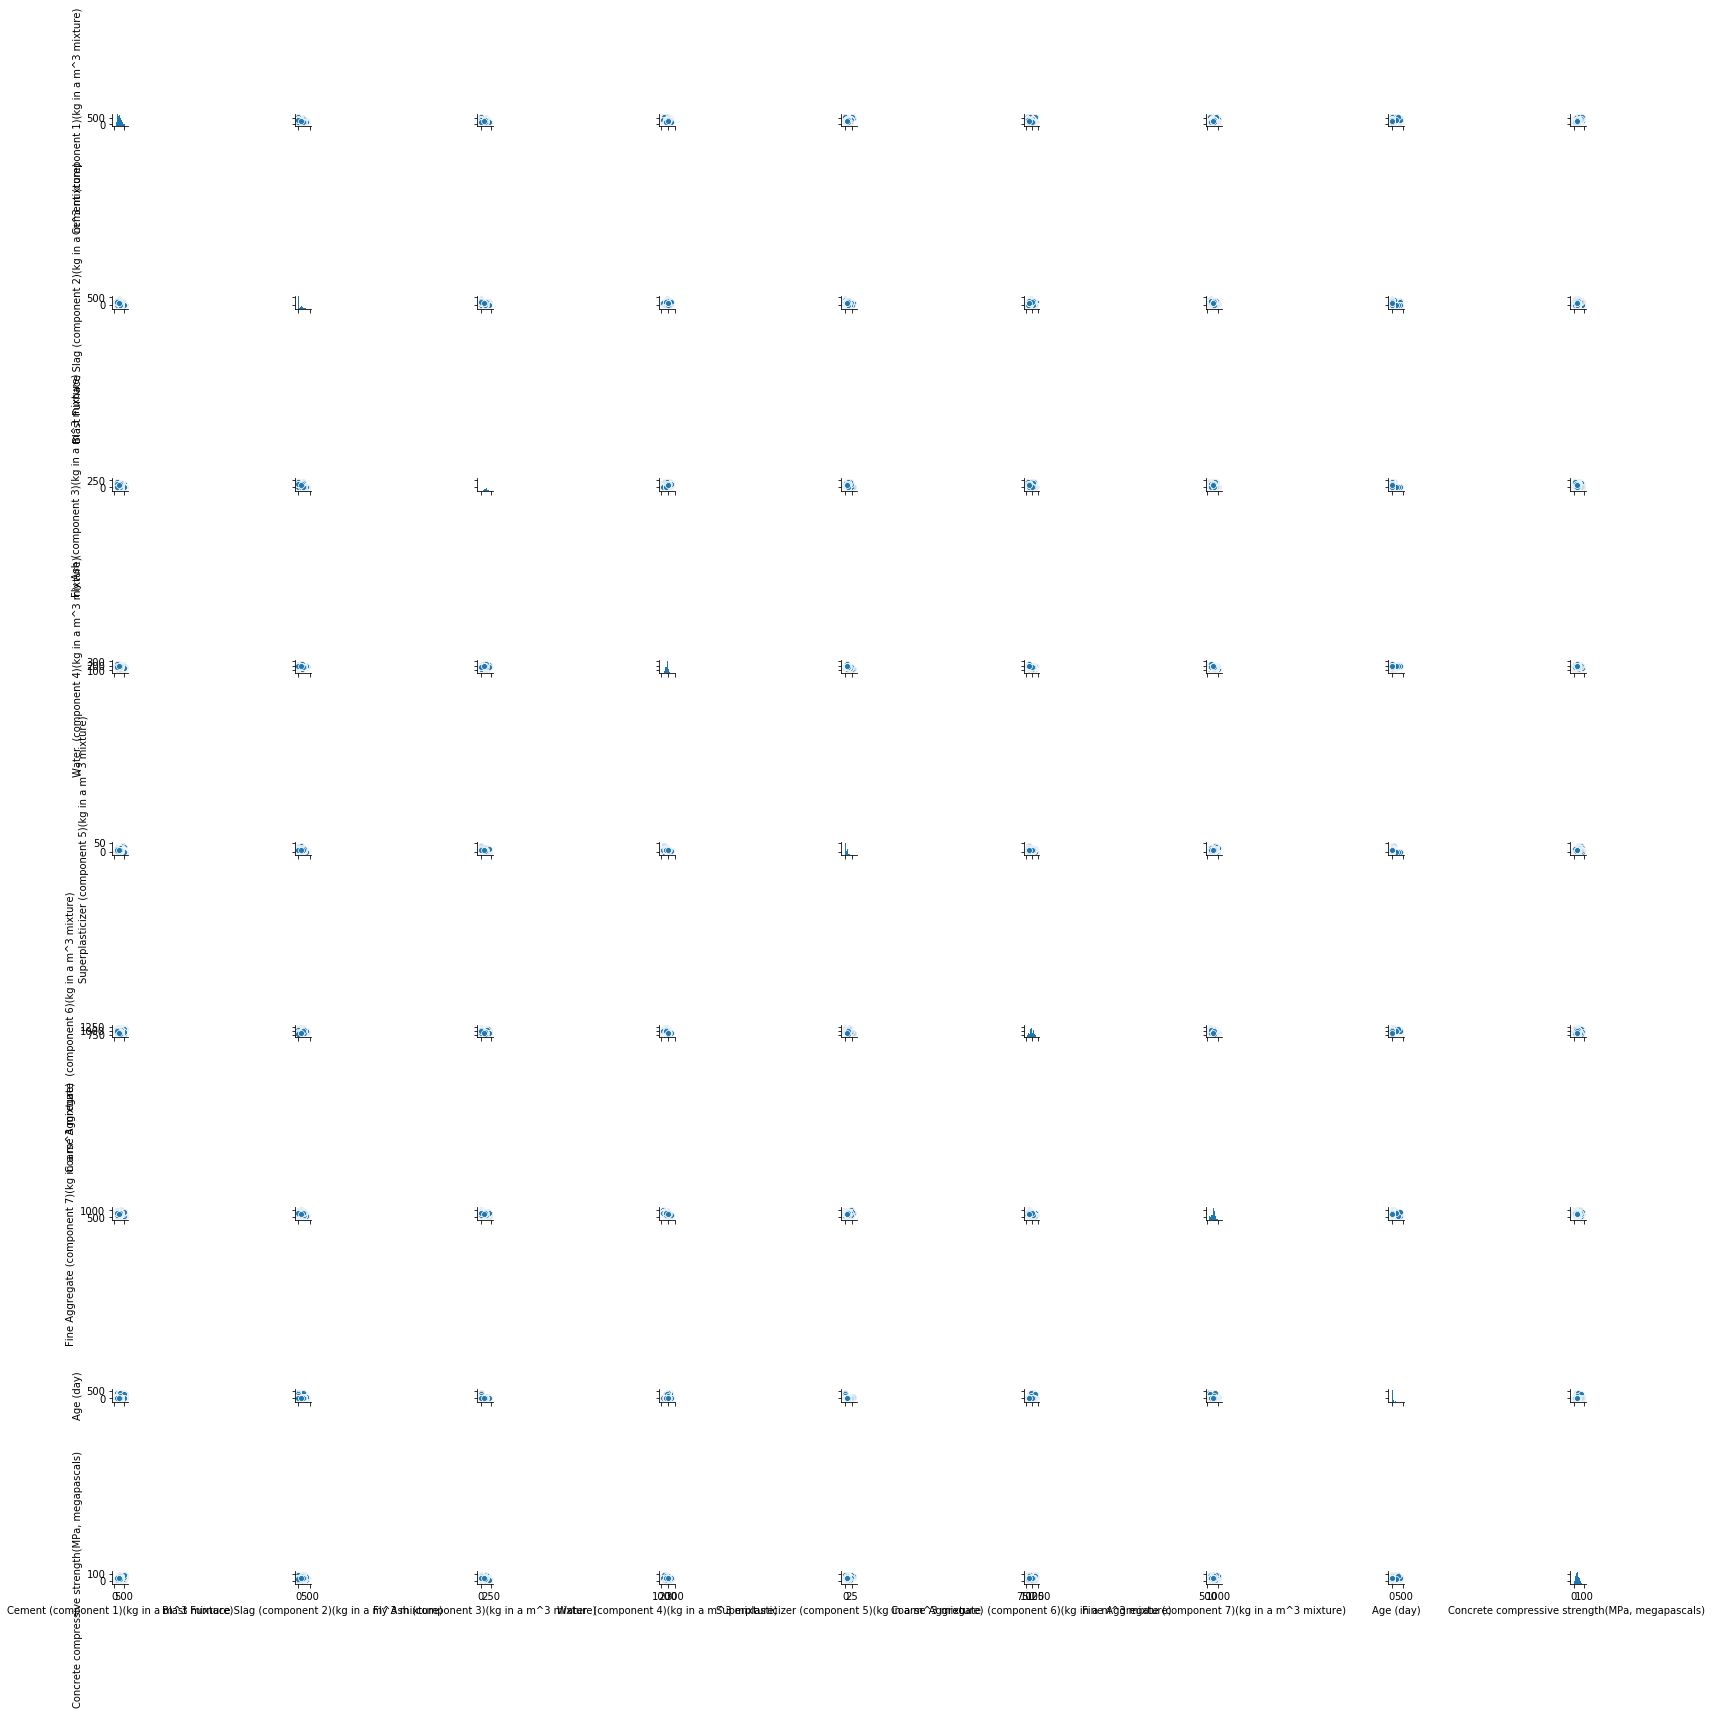

In [84]:
sns.pairplot(df)

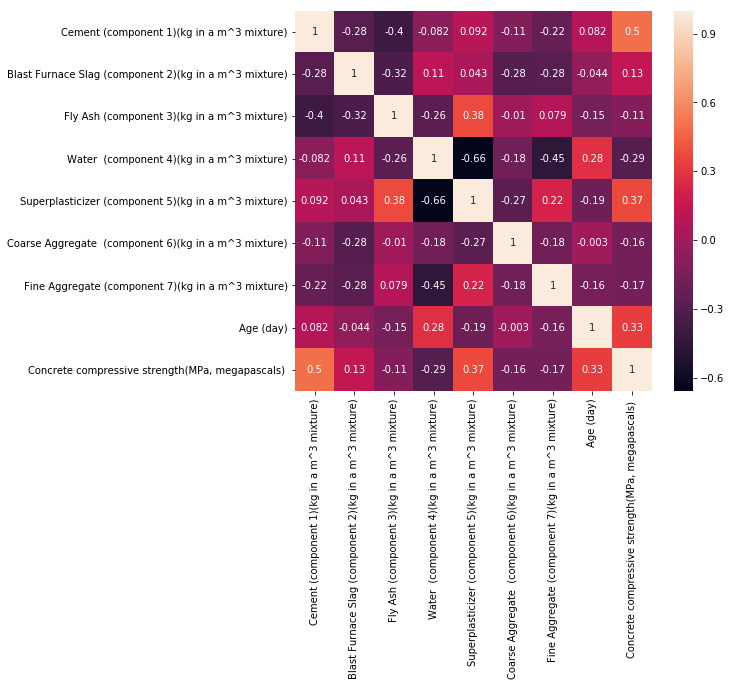

In [85]:
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [86]:
df.shape

(1030, 9)

In [87]:
df_new=df[(z<3).all(axis=1)]

In [88]:
df_new.shape

(981, 9)

In [89]:
df=df_new
df.shape

(981, 9)

In [90]:
x=df.iloc[:,0:-1]
x.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28


In [91]:
y=df.iloc[:,-1]
y.head()

0    79.99
1    61.89
5    47.03
7    36.45
8    45.85
Name: Concrete compressive strength(MPa, megapascals) , dtype: float64

In [92]:
x.shape

(981, 8)

In [93]:
y.shape

(981,)

In [164]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=49)

In [165]:
x_train.shape

(657, 8)

In [166]:
y_train.shape

(657,)

In [167]:
x_test.shape

(324, 8)

In [168]:
y_test.shape

(324,)

In [169]:
lm=LinearRegression()

In [170]:
lm.fit(x_test,y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [171]:
lm.coef_

array([ 0.10013912,  0.0793237 ,  0.05400512, -0.23105535,  0.3706636 ,
       -0.00250089, -0.01026172,  0.21421889])

In [172]:
lm.intercept_

41.04413409624833

In [173]:
df.columns

Index(['Cement (component 1)(kg in a m^3 mixture)',
       'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
       'Fly Ash (component 3)(kg in a m^3 mixture)',
       'Water  (component 4)(kg in a m^3 mixture)',
       'Superplasticizer (component 5)(kg in a m^3 mixture)',
       'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
       'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)',
       'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [174]:
lm.score(x_train,y_train) #71% it is working well

0.717236273576294

In [176]:
#predict the values

pred=lm.predict(x_test)
print("Predicted compressive strength:",pred)
print("CMS (Concrete compressive strength)",y_test)

Predicted compressive strength: [40.16804058 22.03719159 38.91379147 46.68540531 30.4474185  32.37397745
 57.60433749 34.46878891 49.03711599 41.79681818 46.84190517 23.85567408
 24.75371549 24.66039634 54.42515862 23.08991469 46.78300619 38.79775365
 21.7571339  18.85937978 33.34924347 59.980774   54.64152876 28.02335353
 33.13750763 35.8964747  27.01899836 11.23556232 38.37435549 19.54238294
 50.64581483 55.01851049 33.78657575 28.68099176 44.36417838 27.77755849
 28.507801   46.39365593 38.80149331 36.19030824 52.94967478 40.54018849
 34.68154665 44.80554052 27.59191559 45.49771656 32.76272424  9.49687224
 32.55456313 43.89442028 20.14871087 30.67492431 30.43627802 28.63597019
 31.8519639  22.24021398 31.30097724 20.4294919  16.59103469 23.52383347
 33.82792342 24.14031404 13.99546903 40.96315767 34.9918259  56.3167334
 31.62036605 48.60603702 38.66498419 26.74523391 24.35660853 34.64070605
 18.73851633 54.37825549 35.50164837 20.88709907 49.44669711 32.89741017
 56.25359257 34.7083

In [178]:
from sklearn.metrics import mean_squared_error
print("error:")
print(mean_squared_error(y_test,pred))

error:
83.19256449984843


In [179]:
#r2 score-->coefficient of determination
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))
#Here system is predicting 66%correct value
#r2 score(66%)<lm.score

0.6682528448572224
